In [ ]:
from google.colab import files
from IPython.display import Image


### **image1 initial state**

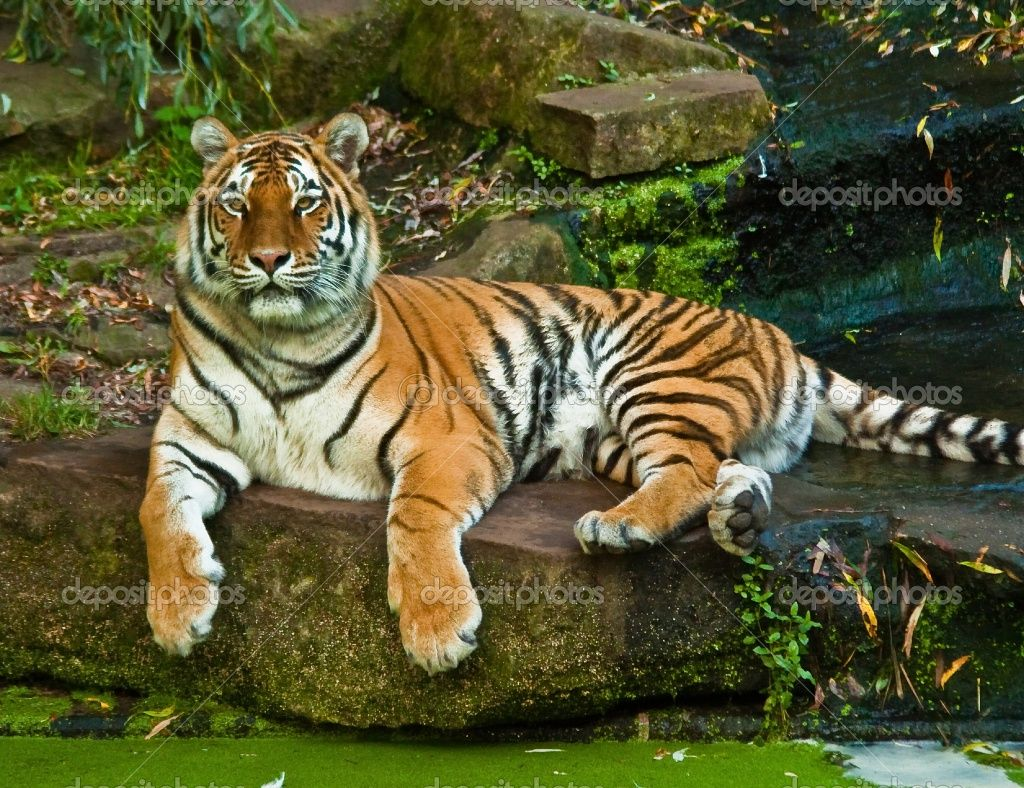

In [ ]:
Image("tiger.jpg")


### **image2 initial state**

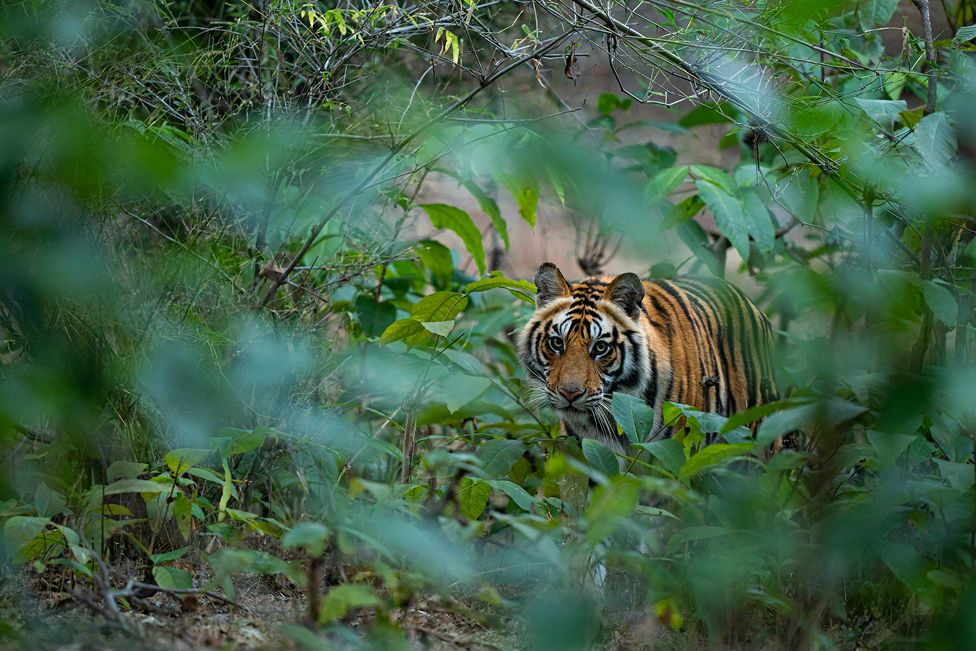

In [ ]:
Image("tiger2.jpg")

### **Resize all images to 256x256x3 format**

In [ ]:
from PIL import Image
import os
import PIL
import glob
import numpy as np
size=(256,256)
tiger = Image.open('tiger.jpg')
image1 = tiger.resize(size)
image1.save('tiger_rs.jpg')


tiger2 = Image.open('tiger2.jpg')
image2 = tiger2.resize(size)
image2.save('tiger_rs2.jpg')



In [ ]:
print("Image1 Shape:",np.shape(image1))
print("Image1 Shape:",np.shape(image2))

Image1 Shape: (256, 256, 3)
Image1 Shape: (256, 256, 3)



### **image1 with new size**

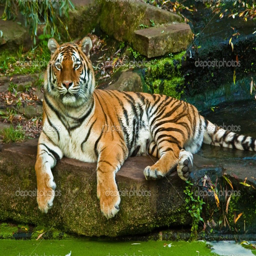

In [ ]:
image1

### **image2 with new size**

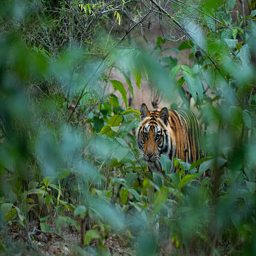

In [ ]:
image2

### **1.flips image1 vertically**


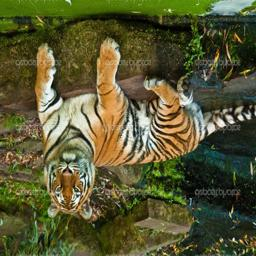

-1

In [ ]:
import cv2
import numpy 
from google.colab.patches import cv2_imshow

image = cv2.imread('tiger_rs.jpg', 1)

image = numpy.array(list(reversed(image)))

cv2_imshow(image)

cv2.waitKey(0)





### **2.flips image1 horizontally**

In [ ]:

image1 = Image.open('tiger_rs.jpg')
width = image1.size[0]
height = image1.size[1]
for y in range(height):
  for x in range(width // 2):
      left = image1.getpixel((x, y))
      right = image1.getpixel((width - 1 - x, y))
      image1.putpixel((width - 1 - x, y), left)
      image1.putpixel((x, y), right)
      


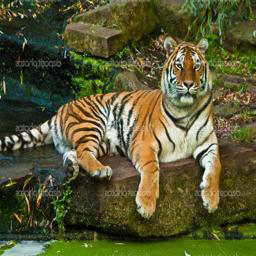

In [ ]:
image1

### **3.rotates image to left by 90 degree**

In [ ]:
import math
import cv2
image1=Image.open('tiger_rs.jpg')
image2=Image.open('tiger_rs2.jpg')


In [ ]:
def rotate(image1,derece):
  for i in range(derece):
      width = image1.size[0]
      height = image1.size[1]
      tmp_size = width*2
      tmp = Image.new('RGBA',(tmp_size,tmp_size),(0,0,0,0))
      cx = int((tmp_size - width)/2)
      cy = int((tmp_size - height)/2)
      tmp.paste(image1,(cx,cy))
      tmp = tmp.rotate(i)
      cuts = int(math.floor((width+height)/math.sqrt(2)))
      pos = int((tmp_size - cuts)/2)
      tmp = tmp.crop((pos,pos,pos+cuts,pos+cuts))
  return tmp

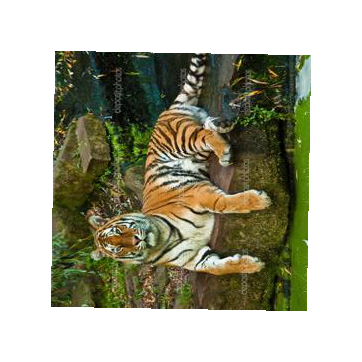

In [ ]:
rotate(image1,90)

### **4.rotates image to right by 90 degree**

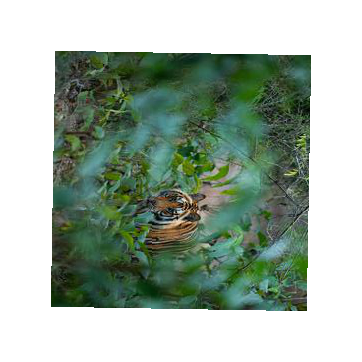

In [ ]:
rotate(image2,270)

### **5.resizes input image to half by keeping aspect ratio**

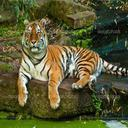

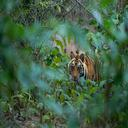

In [ ]:
from google.colab.patches import cv2_imshow
mywidth=128
img = Image.open('tiger_rs.jpg')
wpercent = (mywidth/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img = img.resize((mywidth,hsize), PIL.Image.ANTIALIAS)
img.save('resized_half_tiger1.jpg')

img = Image.open('tiger_rs2.jpg')
wpercent = (mywidth/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img = img.resize((mywidth,hsize),PIL.Image.ANTIALIAS)
img.save('resized_half_tiger2.jpg')


half_img1 = cv2.imread('resized_half_tiger1.jpg')
half_img2 = cv2.imread('resized_half_tiger2.jpg')

cv2_imshow(half_img1)
cv2_imshow(half_img2)

### **6.Crop left half of image1 and right half of image2, then merge these parts to create a new image.**



In [ ]:
width, height = image1.size

wid = int(width / 2)

cropped_tiger1 = image1.crop((0, 0, wid, height))


width, height = image2.size

wid = int(width / 2)
hei = int(height/2)

cropped_tiger2 = image2.crop((hei, 0, width, height))

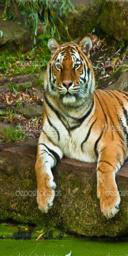

In [ ]:
cropped_tiger1

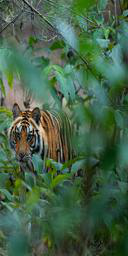

In [ ]:
cropped_tiger2

In [ ]:
im1=cropped_tiger1
im2=cropped_tiger2
def get_concat_h(im1, im2):
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

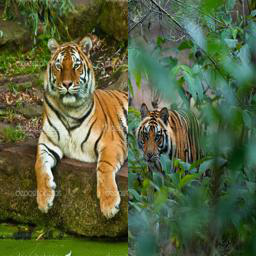

In [ ]:
get_concat_h(im1, im2)